In [1]:
import pandas as pd
import numpy as np

In [13]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import sklearn
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_data = pd.read_csv('C:/Users/User/Desktop/Quantum_internship/internship_train.csv')

In [5]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [6]:
target_data = train_data.target
target_data.head()

0    20.107472
1    61.763713
2    74.651162
3    69.424645
4    66.767304
Name: target, dtype: float64

In [7]:
features_data = train_data.iloc[:,:-1].copy()
features_data.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419


In [8]:
predict_data = pd.read_csv('C:/Users/User/Desktop/Quantum_internship/internship_hidden_test.csv')
predict_data.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


In [9]:
classifiers = [
    [ linear_model.Lasso(), { 'alpha': [0.5,0.6,0.7,0.8,0.9,1] } ],
    [ linear_model.Ridge(), { 'alpha': [0.5,0.6,0.7,0.8,0.9,1] } ],
    [ linear_model.ElasticNet(), {'alpha': [0.6,0.8,1], 'l1_ratio' : [0,0.25,0.5,0.75,1] } ],
    [ linear_model.LinearRegression(), {}]
]

In [10]:
best_rmse = -1
best_clf = -1
for item in classifiers:
    clf = GridSearchCV(estimator=item[0], param_grid=item[1], scoring='neg_root_mean_squared_error', cv=5)
    clf.fit(features_data, target_data)
    if best_rmse == -1 or best_rmse > clf.best_score_*(-1):
        best_rmse = clf.best_score_*(-1)
        best_clf = clf     

In [11]:
print(f'Best classifier: {best_clf.best_estimator_}')
print(f'Scorer function: {best_clf.scorer_}')
print(f'RMSE: {best_clf.best_score_*(-1)}')
result_data = pd.Series(best_clf.predict(predict_data))
result_data.to_csv('C:/Users/User/Desktop/Quantum_internship/internship_result.csv')
print(f'Coefficients: {best_clf.best_estimator_.coef_}')

Best classifier: Lasso(alpha=1)
Scorer function: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
RMSE: 28.898852272945085
Coefficients: [ 0.00043346 -0.00106324  0.00014887  0.00050953 -0.00021115 -0.00037459
  0.          0.          0.          0.00025536  0.00062935 -0.00026191
  0.00035335 -0.         -0.          0.         -0.          0.
  0.          0.         -0.          0.          0.          0.
  0.          0.          0.         -0.          0.         -0.
 -0.          0.          0.         -0.          0.         -0.
  0.          0.         -0.          0.         -0.         -0.
 -0.          0.          0.         -0.          0.          0.
 -0.          0.         -0.         -0.         -0.        ]


<AxesSubplot:xlabel='target', ylabel='Count'>

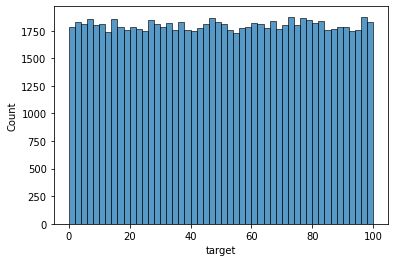

In [14]:
sns.histplot(target_data, bins=50)

<AxesSubplot:ylabel='Count'>

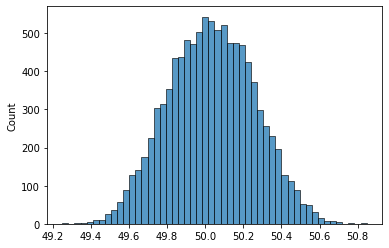

In [15]:
sns.histplot(result_data, bins=50)

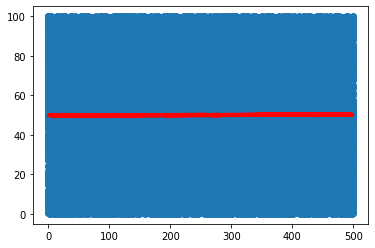

In [16]:
from matplotlib import pyplot as plt

plt.scatter(features_data['0'], target_data)
plt.plot(predict_data['0'], best_clf.predict(predict_data), color='red', linewidth=2)